In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

In [10]:
# Helper Plotting Functions
def plot(x, Y, labels, xlabel, ylabel, title):
    plt.figure(figsize=(8, 6))
    for i in range(len(labels)):
        plt.plot(x, Y[i], label=labels[i])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()


def plot_SNR(
    x,
    simulation,
    theortical,
    simulation_labels,
    theortical_labels,
    xlabel,
    ylabel,
    title,
):
    plt.figure(figsize=(8, 6))
    n = len(simulation_labels)
    for i in range(0, n, 1):
        plt.plot(x, simulation[i], marker="o", label=simulation_labels[i]) # simulation value plotting
        plt.plot(x, theortical[i], linestyle="--", label=theortical_labels[i])  # theortical value plotting
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()

# Requirment One & Two

In [11]:
def UniformQuantizer(in_val, n_bits, xmax, m):
    L = 2**n_bits  # Number of levels
    delta = 2 * xmax / L  # Quantization step size
    q_ind = (in_val - (m * (delta / 2) - xmax)) / delta  # Quantization index
    q_ind = q_ind.astype(int)  # Convert to integer
    return q_ind


def UniformDequantizer(q_ind, n_bits, xmax, m):
    L = 2**n_bits  # Number of levels
    delta = 2 * xmax / L  # Quantization step size
    deq_val = delta * (q_ind + 0.5 * (m + 1)) - xmax  # Dequantized value
    return deq_val

# Requirment Three

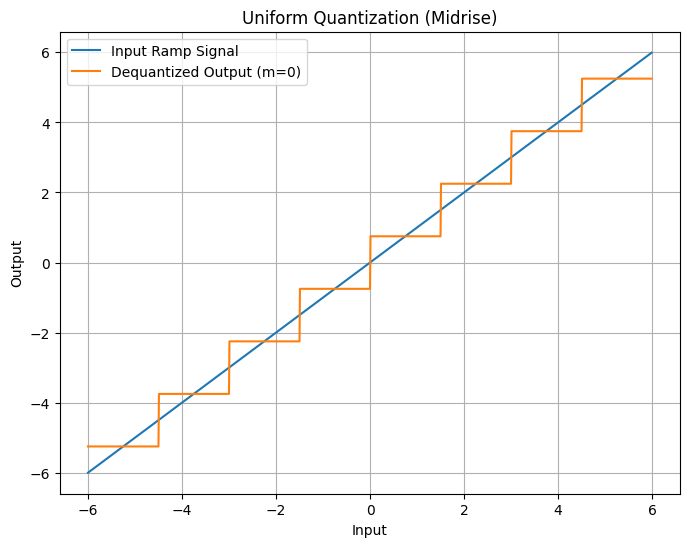

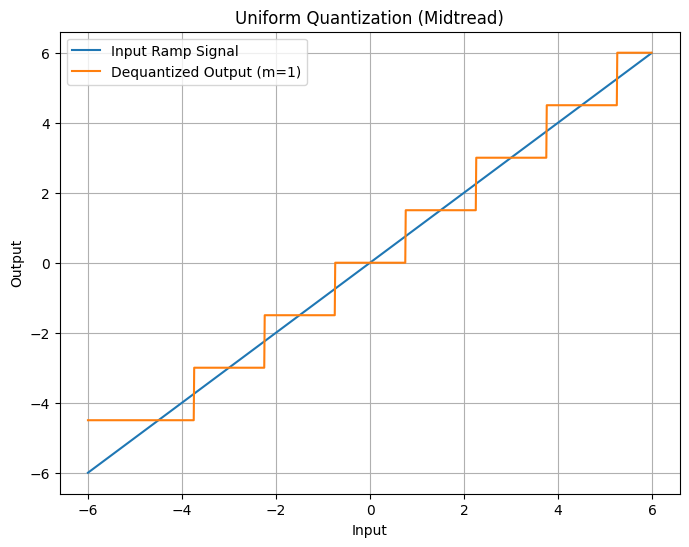

In [12]:
def ramp_test():
    # Generate the input ramp signal
    n_bits = 3
    x_max = 6
    m = 0
    x = np.arange(-6, 6, 0.01)

    # Quantize the input signal using Midrise
    q_ind_midrise = UniformQuantizer(x, n_bits, x_max, m)

    # Dequantize the quantized signal
    deq_val_midrise = UniformDequantizer(q_ind_midrise, n_bits, x_max, m)

    # Plot the input and dequantized output
    plot(
        x,
        [x, deq_val_midrise],
        ["Input Ramp Signal", "Dequantized Output (m=0)"],
        "Input",
        "Output",
        "Uniform Quantization (Midrise)",
    )

    # Quantize the input signal with using Midread
    q_ind_midtread = UniformQuantizer(x, n_bits=3, xmax=6, m=1)

    # Dequantize the quantized signal
    deq_val_midtread = UniformDequantizer(q_ind_midtread, n_bits=3, xmax=6, m=1)

    # Plot the input and dequantized output
    plot(
        x,
        [x, deq_val_midtread],
        ["Input Ramp Signal", "Dequantized Output (m=1)"],
        "Input",
        "Output",
        "Uniform Quantization (Midtread)",
    )


ramp_test()

# Requirement Four

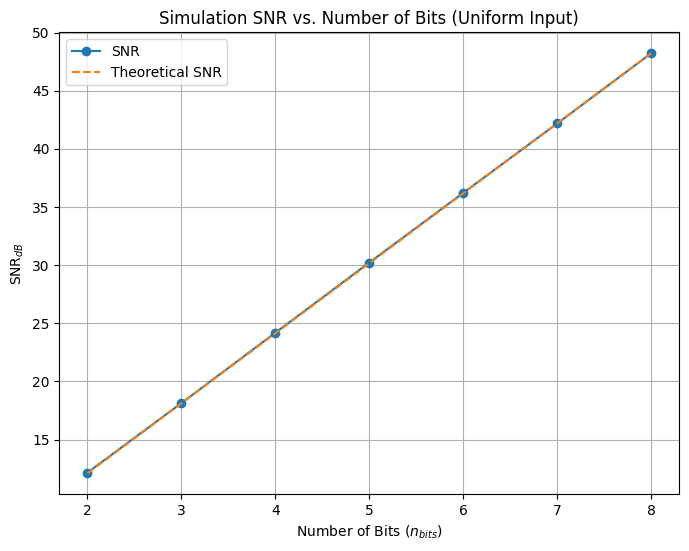

In [13]:
def random_test():
    # Generate random input signal
    input_signal = np.random.uniform(low=-5, high=5, size=10000)

    xmax = 5
    m = 0
    n_bits_range = range(2, 9)
    snr_values = []
    theoretical_snr = []
    # Calculate SNR and quantization error for each n_bits
    for n_bits in n_bits_range:
        q_ind = UniformQuantizer(
            input_signal, n_bits, xmax, m
        )  # Quantize the input signal
        deq_val = UniformDequantizer(
            q_ind, n_bits, xmax, m
        )  # Dequantize the quantized signal
        quantization_error = input_signal - deq_val  # Calculate quantization error

        E_x2 = np.mean(input_signal**2)  # Calculate E[x^2]
        E_error2 = np.mean(quantization_error**2)  # Calculate E[error^2]
        snr = E_x2 / E_error2  # Calculate SNR
        snr_values.append(snr)
        theoretical_snr.append(
            (3 * (2**n_bits) ** 2 * E_x2) / xmax**2
        )  # Calculate Theoretical SNR
    # Plot SNR vs n_bits
    plot_SNR(
        n_bits_range,
        [10 * np.log10(snr_values)],
        [10 * np.log10(theoretical_snr)],
        ["SNR"],
        ["Theoretical SNR"],
        "Number of Bits ($n_{bits}$)",
        "SNR$_{dB}$",
        "Simulation SNR vs. Number of Bits (Uniform Input)",
    )


random_test()

# Requirement Five & Six

In [14]:
num_samples = 10000
polarity = np.random.choice(
    [-1, 1], size=num_samples, p=[0.5, 0.5]
)  # Randomly select polarity
magnitude = np.random.exponential(size=num_samples)  # Generate exponential magnitude
input_signal = polarity * magnitude  # Generate input signal

# Parameters
xmax = max(abs(input_signal))  # Calculate maximum value of input signal
m = 0
n_bits_range = range(2, 9)

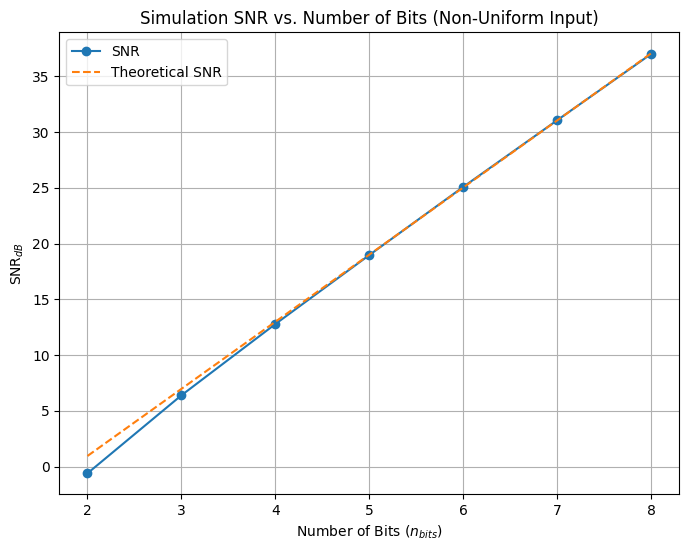

In [15]:
def exponential_test():
    snr_values = []
    theoretical_snr = []
    for n_bits in n_bits_range:
        q_ind = UniformQuantizer(
            input_signal, n_bits, xmax, m
        )  # Quantize the input signal
        deq_val = UniformDequantizer(
            q_ind, n_bits, xmax, m
        )  # Dequantize the quantized signal
        quantization_error = input_signal - deq_val  # Calculate quantization error
        E_x2 = np.mean(input_signal**2)  # Calculate E[x^2]
        E_error2 = np.mean(quantization_error**2)  # Calculate E[error^2]
        snr = E_x2 / E_error2  # Calculate SNR
        snr_values.append(snr)
        # Calculate Theoretical SNR
        theoretical_snr.append((3 * (2**n_bits) ** 2 * E_x2) / xmax**2)

    # Plot SNR vs n_bits
    plot_SNR(
        n_bits_range,
        [10 * np.log10(snr_values)],
        [10 * np.log10(theoretical_snr)],
        ["SNR"],
        ["Theoretical SNR"],
        "Number of Bits ($n_{bits}$)",
        "SNR$_{dB}$",
        "Simulation SNR vs. Number of Bits (Non-Uniform Input)",
    )


exponential_test()

In [16]:
def mu_law_compression(normalized_x, mu):
    return np.sign(normalized_x) * (np.log1p(mu * np.abs(normalized_x)) / np.log1p(mu))


def mu_law_expansion(y, mu):
    return np.sign(y) * ((1 + mu) ** np.abs(y) - 1) / mu

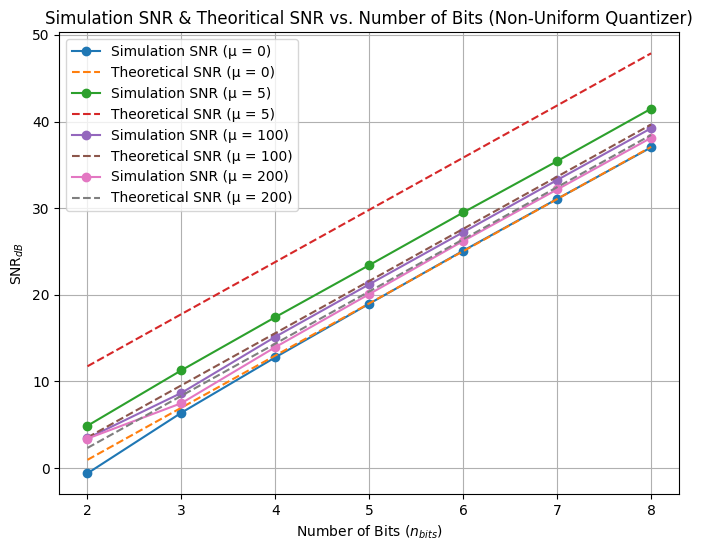

In [17]:
def final_test():
    mu_values = [0, 5, 100, 200]  # mu values
    simulation_SNR_list = []
    theoritical_SNR_list = []
    for mu in mu_values:
        simulaton_snr = []  # Initialize SNR values
        theoretical_snr = []  # Initialize Theoretical SNR values
        for n_bits in n_bits_range:
            in_sig = input_signal  # Initialize input signal
            if mu > 0:  # If mu > 0, compress the input signal
                in_sig = mu_law_compression(input_signal / xmax, mu)
            # Quantize the input signal
            q_ind = UniformQuantizer(in_sig, n_bits, np.max(abs(in_sig)), 0)
            # Dequantize the quantized signal
            deq_val = UniformDequantizer(q_ind, n_bits, np.max(abs(in_sig)), 0)
            if mu > 0:
                deq_val = (
                    mu_law_expansion(deq_val, mu) * xmax
                )  # Expand the dequantized signal agian

            quantization_error = input_signal - deq_val  # Calculate quantization error
            E_x2 = np.mean(input_signal**2)  # Calculate E[x^2]
            E_error2 = np.mean(quantization_error**2)  # Calculate E[error^2]
            snr = E_x2 / E_error2  # Calculate SNR
            simulaton_snr.append(snr)
            # Calculate Theoretical SNR
            if mu > 0:
                theoretical_snr.append((3 * (2**n_bits) ** 2) / (np.log1p(mu) ** 2))
            else:
                theoretical_snr.append((3 * (2**n_bits) ** 2 * E_x2) / xmax**2)
        simulation_SNR_list.append(simulaton_snr)
        theoritical_SNR_list.append(theoretical_snr)

    # Plot SNR vs n_bits
    simulaton_labels = [
        "Simulation SNR (μ = 0)",
        "Simulation SNR (μ = 5)",
        "Simulation SNR (μ = 100)",
        "Simulation SNR (μ = 200)",
    ]
    theoretical_labels = [
        "Theoretical SNR (μ = 0)",
        "Theoretical SNR (μ = 5)",
        "Theoretical SNR (μ = 100)",
        "Theoretical SNR (μ = 200)",
    ]
    plot_SNR(
        n_bits_range,
        10 * np.log10(simulation_SNR_list),
        10 * np.log10(theoritical_SNR_list),
        simulaton_labels,
        theoretical_labels,
        "Number of Bits ($n_{bits}$)",
        "SNR$_{dB}$",
        "Simulation SNR & Theoritical SNR vs. Number of Bits (Non-Uniform Quantizer)",
    )


final_test()